## MSC_DA_CA1 - Leda Gale

According to the guides of the project, the study has been based on data taken from The Central Statistics Office (CSO) which is Ireland’s national statistical office, their purpose is to impartially collect, analyze, and make available statistics about Ireland’s people, society, and economy.
The dataset analyzed is “Population at Each Census 1841 to 2016”, it was downloaded from the website as a CSV file named “E2001”.

- Programming 

Python counts with eight key pieces: data types, object references, logical operations, control flow statements, arithmetic operators, input/output, creation, and calling of functions.
Data type identification has been done to understand the dataset (elaboration of a dictionary). Clear object references used as it has been necessary to store information to give it proper use. 
Creation of functions such as “label_graph”, “save_results”, and “show_results” to avoid the repetition of code and used of control flow statements as the for loops with the purpose of extracting the data.



Imperative and procedural programming paradigms were used in the present project. As instructions were created to extract points of interest and  procedural programming at the moment of the creation of the definition to avoid unnecessary repetitive code

- Loading the libraries to be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import iqr, skew, norm, uniform, kurtosis, kstest, shapiro, binom, bernoulli ,poisson
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from empiricaldist import Pmf, Cdf
from sklearn.preprocessing import LabelEncoder

## EDA

This initial stage is called Exploratory Data Analysis (EDA), which involves exploring and summarizing data to identify patterns and relationships.

- Data exploration 

In [2]:
#Importing the data
df = pd.read_csv("E2001.csv")

In [3]:
#General revision of features included on the dataset
df.head()

,Statistic Label,County,Sex,CensusYear,UNIT,VALUE
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,Number,6528799
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,Number,5111557
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,Number,4402111
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,Number,4053187
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,Number,3870020


In [4]:
#Identifying the dataset shape
df.shape

(2025, 6)

In [5]:
#Data types exploration
df.dtypes

Statistic Label    object
County             object
Sex                object
CensusYear          int64
UNIT               object
VALUE               int64
dtype: object

In [6]:
#Examination on the general statistic parameters of the dataset
df.describe()

,CensusYear,VALUE
count,2025.000000,2.025000e+03
mean,1943.560000,1.822066e+05
std,52.710705,5.052940e+05
min,1841.000000,1.201300e+04
25%,1901.000000,3.630800e+04
50%,1956.000000,6.288100e+04
75%,1986.000000,1.115240e+05
max,2016.000000,6.528799e+06


In [7]:
#Searching for more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Statistic Label  2025 non-null   object
 1   County           2025 non-null   object
 2   Sex              2025 non-null   object
 3   CensusYear       2025 non-null   int64 
 4   UNIT             2025 non-null   object
 5   VALUE            2025 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 95.1+ KB


In [8]:
#Null values revision
df.isna().sum()

Statistic Label    0
County             0
Sex                0
CensusYear         0
UNIT               0
VALUE              0
dtype: int64

In [9]:
#Duplicates revision
df.duplicated().sum()

0

In [10]:
#Renaming columns for better understanding
df.rename(columns = {"Statistic Label": "Stat_label", "CensusYear": "Year", "VALUE": "Population"}, inplace = True)
df.drop(columns = ["UNIT"], inplace = True)
df

,Stat_label,County,Sex,Year,Population
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020
...,...,...,...,...,...
2020,Population at Each Census 1841 to 2016,Monaghan,Female,1996,25155
2021,Population at Each Census 1841 to 2016,Monaghan,Female,2002,25787
2022,Population at Each Census 1841 to 2016,Monaghan,Female,2006,27414
2023,Population at Each Census 1841 to 2016,Monaghan,Female,2011,30042


- Amplifiying knowledge about each attribute

In [11]:
#Statistics label observations and quantity
print(f'Stat_label: {df["Stat_label"].unique()}')
print(f'Stat_label: {df["Stat_label"].nunique()}')

Stat_label: ['Population at Each Census 1841 to 2016']
Stat_label: 1


In [12]:
#County observations and quantity
print(f'County: {df["County"].unique()}')
print(f'County: {df["County"].nunique()}')

County: ['State' 'Carlow' 'Dublin' 'Kildare' 'Kilkenny' 'Laois' 'Longford' 'Louth'
 'Meath' 'Offaly' 'Westmeath' 'Wexford' 'Wicklow' 'Clare' 'Cork' 'Kerry'
 'Limerick' 'Tipperary' 'Waterford' 'Galway' 'Leitrim' 'Mayo' 'Roscommon'
 'Sligo' 'Cavan' 'Donegal' 'Monaghan']
County: 27


In [13]:
#Sex observations and quantity
print(f'Sex: {df["Sex"].unique()}')
print(f'Sex: {df["Sex"].nunique()}')

Sex: ['Both sexes' 'Male' 'Female']
Sex: 3


In [14]:
#Year observations and quantity
print(f'Year: {df["Year"].unique()}')
print(f'Year: {df["Year"].nunique()}')

Year: [1841 1851 1861 1871 1881 1891 1901 1911 1926 1936 1946 1951 1956 1961
 1966 1971 1979 1981 1986 1991 1996 2002 2006 2011 2016]
Year: 25


- Dataset splitting

After the individual revision of the attributes I have found the dataset contains generalized observations as "State" in "County" attribute which seems to resume the entire dataset divided in all counties. The same case was identified for "Sex" as it has a "Both sexes" observation and "Male" and "Female".
I decided to split the data set in df_general and df_expanded to manage my dataset. 
I considered necessaty to test if the data is consistent by having a look in both separate grouping them by Year and summing the Population data.

In [15]:
#General dataset
df.loc[df["Sex"] == "Both sexes"].loc[df["County"] == "State"].groupby("Year")["Population"].sum()

Year
1841    6528799
1851    5111557
1861    4402111
1871    4053187
1881    3870020
1891    3468694
1901    3221823
1911    3139688
1926    2971992
1936    2968420
1946    2955107
1951    2960593
1956    2898264
1961    2818341
1966    2884002
1971    2978248
1979    3368217
1981    3443405
1986    3540643
1991    3525719
1996    3626087
2002    3917203
2006    4239848
2011    4588252
2016    4761865
Name: Population, dtype: int64

In [16]:
#Expanded dataset
df.loc[df["Sex"] != "Both sexes"].loc[df["County"] != "State"].groupby("Year")["Population"].sum()

Year
1841    6528799
1851    5111557
1861    4402111
1871    4053187
1881    3870020
1891    3468694
1901    3221823
1911    3139688
1926    2971992
1936    2968420
1946    2955107
1951    2960593
1956    2898264
1961    2818341
1966    2884002
1971    2978248
1979    3368217
1981    3443405
1986    3540643
1991    3525719
1996    3626087
2002    3917203
2006    4239848
2011    4588252
2016    4761865
Name: Population, dtype: int64

- Sectioning the data in the Generalized one (Including the general data of "Both sexes" and "State" which includes all the counties)

In [17]:
df_general = df.loc[df["Sex"] == "Both sexes"].loc[df["County"] == "State"]
df_general

,Stat_label,County,Sex,Year,Population
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020
5,Population at Each Census 1841 to 2016,State,Both sexes,1891,3468694
6,Population at Each Census 1841 to 2016,State,Both sexes,1901,3221823
7,Population at Each Census 1841 to 2016,State,Both sexes,1911,3139688
8,Population at Each Census 1841 to 2016,State,Both sexes,1926,2971992
9,Population at Each Census 1841 to 2016,State,Both sexes,1936,2968420


- Sectioning the data in the Expanded one (Including "Both sexes" which is Male and Female and "State" all the counties)

In [18]:
df_expanded = df.loc[df["Sex"] != "Both sexes"].loc[df["County"] != "State"]
df_expanded 

,Stat_label,County,Sex,Year,Population
100,Population at Each Census 1841 to 2016,Carlow,Male,1841,42428
101,Population at Each Census 1841 to 2016,Carlow,Male,1851,33016
102,Population at Each Census 1841 to 2016,Carlow,Male,1861,28139
103,Population at Each Census 1841 to 2016,Carlow,Male,1871,25464
104,Population at Each Census 1841 to 2016,Carlow,Male,1881,23078
...,...,...,...,...,...
2020,Population at Each Census 1841 to 2016,Monaghan,Female,1996,25155
2021,Population at Each Census 1841 to 2016,Monaghan,Female,2002,25787
2022,Population at Each Census 1841 to 2016,Monaghan,Female,2006,27414
2023,Population at Each Census 1841 to 2016,Monaghan,Female,2011,30042


- Plotting the Population number by Year to see how it has behaved

In [19]:
#Creating a definition for the label in the graphs as it will be repetetive code
def label_graph(x_label , y_label , title_label,width,height):
    
    plt.figure(figsize = (width,height))    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_label)


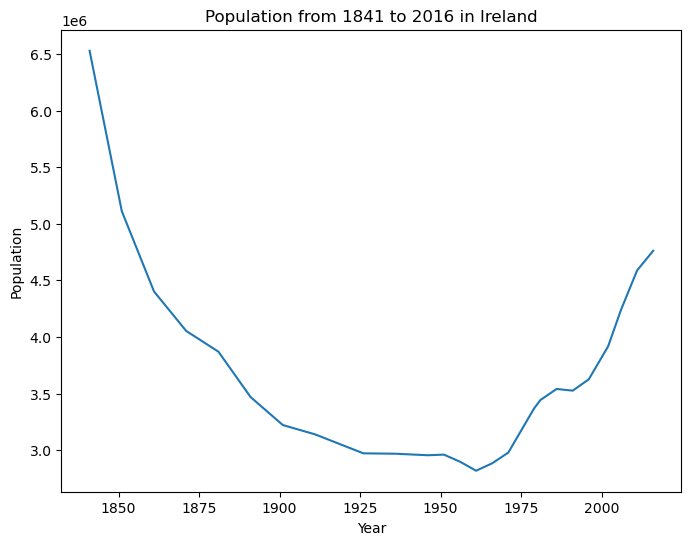

In [20]:
#Plotting the Population from 1841 to 2016 in Ireland
label_graph("Year", "Population", "Population from 1841 to 2016 in Ireland",8,6)
sns.lineplot(x = "Year", y = "Population", data = df_general);

The graphic presents the Population between the years 1841 and 2016. As we can see the highest value is in the first year with a population of 6,528,799 having a big drop after it. 
The population kept decreasing and after Northern Ireland and Ireland split in two in 1921 this feature had its lowest point with 2,818,341 inhabitants in 1961.

- After visualizig how the population value has changed over the years, and having the data of population by County I thought it would be interesting to visualize how this population was distributed by counties. It is believed that Dublin being the capital has the largest amount of population, however I want to see graphically the difference.

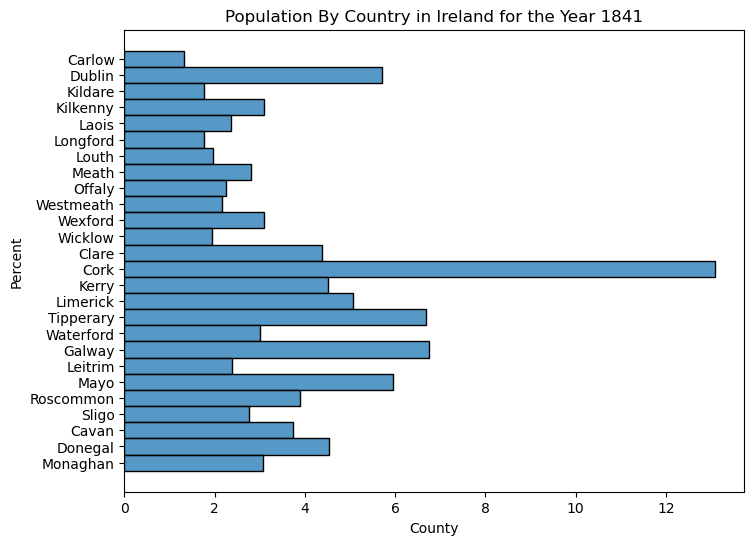

In [21]:
#Plotting the percent of population by county for an specific year (1841)
label_graph("County", "Percent", "Population By Country in Ireland for the Year 1841",8,6)
sns.histplot(weights = "Population",y = "County", multiple="dodge", stat="percent", data = df_expanded.loc[df["County"] != "State"].loc[df["Year"] == 1841]);

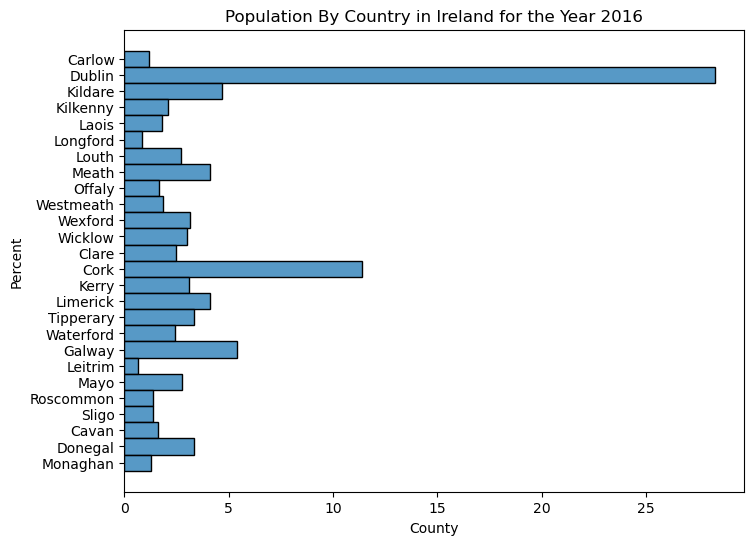

In [22]:
#Plotting the percent of population by county for an specific year (2016)
label_graph("County", "Percent", "Population By Country in Ireland for the Year 2016",8,6)
sns.histplot(weights = "Population",y = "County", multiple="dodge", stat="percent", data = df_expanded.loc[df["County"] != "State"].loc[df["Year"] == 2016]);

As shown above Dublin occupies a relevant percentage of the population compared to the other counties having Cork as the second highest percentage, however this has not been always the case as it can be observed on the first plot for the year 1841 were Cork had the biggest percentage.

- Distribution of Population by County - years (1841,1871,1901,2002,2016)

I used a control flow staten such as the for loop to iterate through specific years (1841,1871,1901,2002,2016) to show the population by county and gender. We can see that in 1841 the most majority of Male and Female in the country lived in county Cork, and even Tipperary and Galway had more population at the moment, leaving Dublin in the fourth place.
By 1871 population in Dublin increased significantly, at 1901 this county was already majority, however Cork still had a significant porcentage.
By 2016 Dublin stablished a huge difference compared to the other counties having the predominant part of the people.

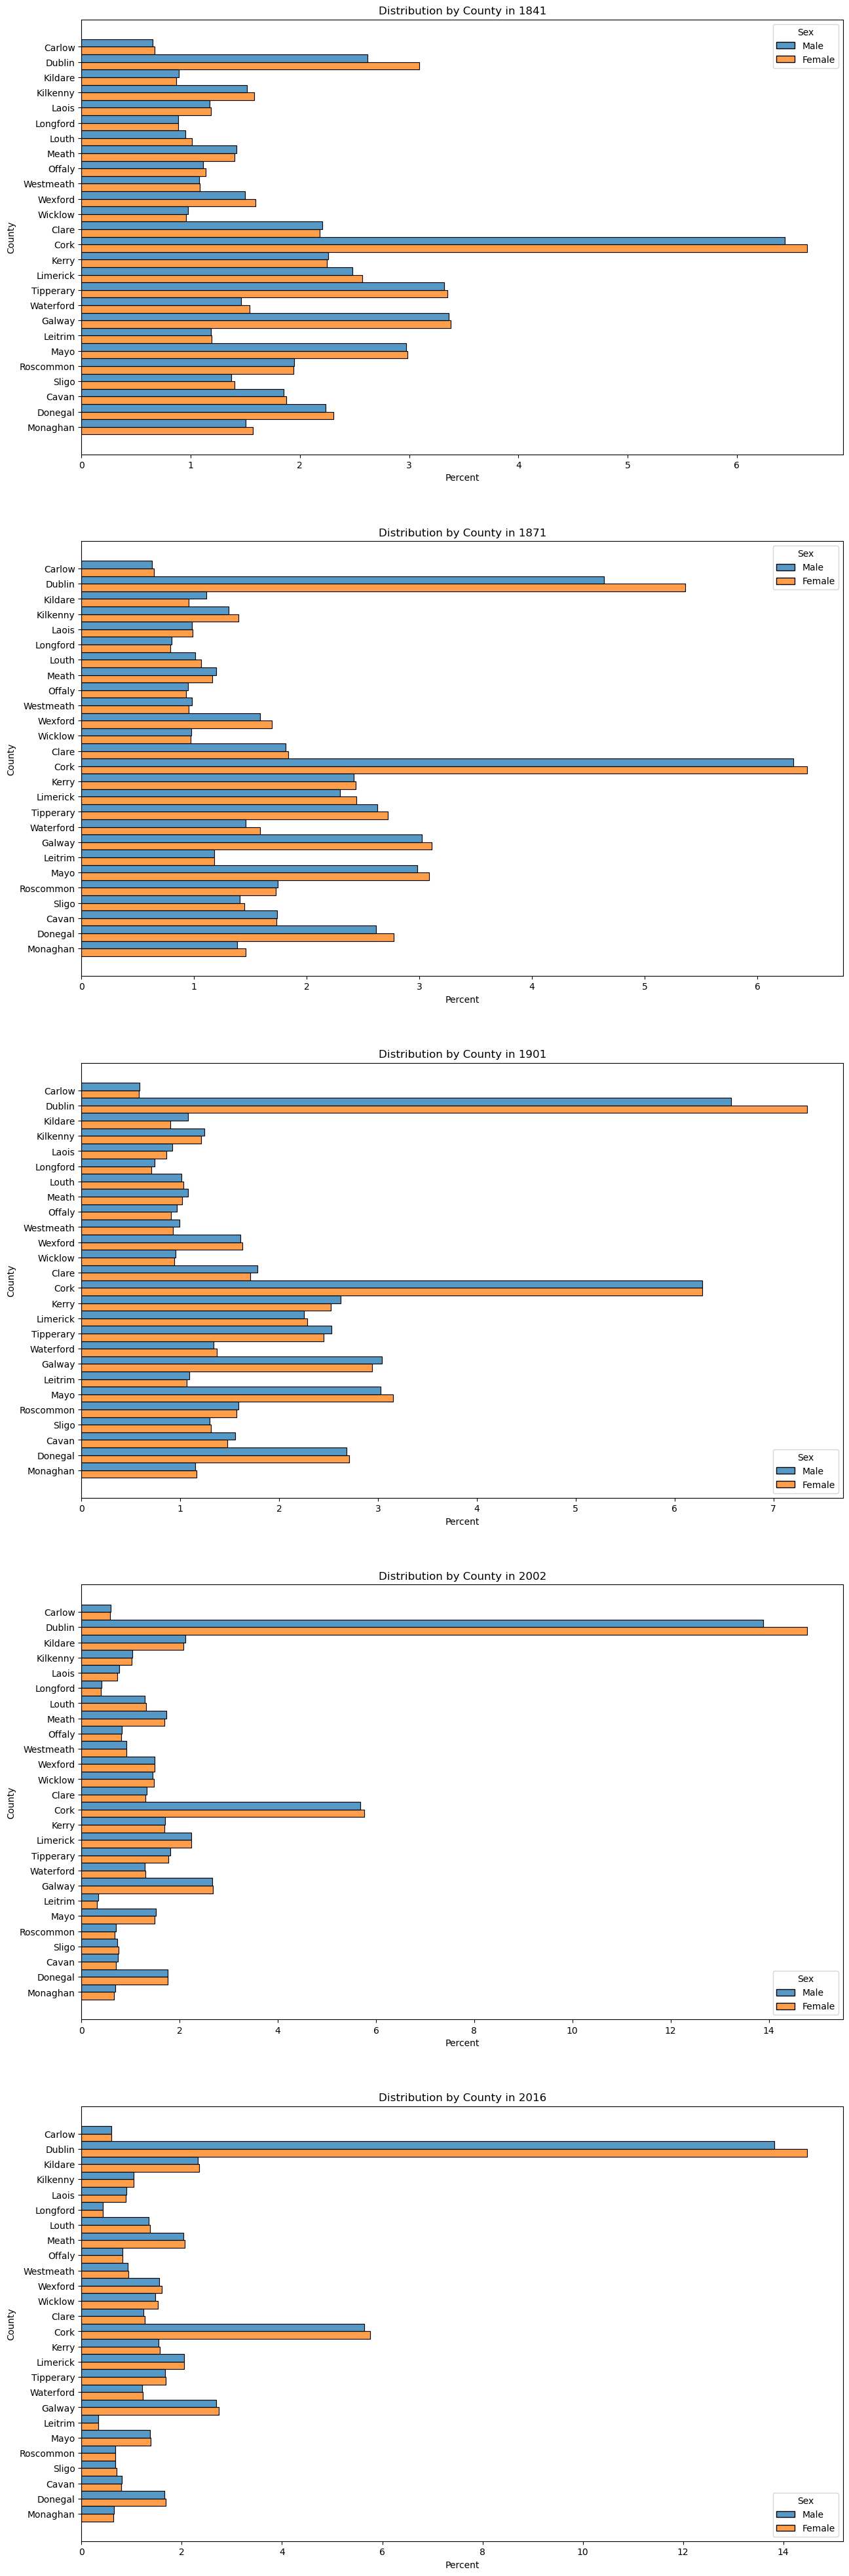

In [23]:
years = [1841,1871,1901,2002,2016]

# Create a subplot for each year
fig, axes = plt.subplots(nrows = len(years), figsize = (15, 50), sharey = True)

# Loop for over the years
for i, year in enumerate(years):
    data = df_expanded.loc[df_expanded["Year"] == year]
    sns.histplot(y = "County", weights = "Population", multiple = "dodge",hue = "Sex", stat = "percent", data = data, ax = axes[i]);
    axes[i].set_title(f'Distribution by County in {year}')

plt.show()

- Density analysis

In [24]:
#Creating density dataset for the analysis
df_density = df.loc[df["Sex"] == "Both sexes"].loc[df["County"] != "State"]
df_density

,Stat_label,County,Sex,Year,Population
75,Population at Each Census 1841 to 2016,Carlow,Both sexes,1841,86228
76,Population at Each Census 1841 to 2016,Carlow,Both sexes,1851,68078
77,Population at Each Census 1841 to 2016,Carlow,Both sexes,1861,57137
78,Population at Each Census 1841 to 2016,Carlow,Both sexes,1871,51650
79,Population at Each Census 1841 to 2016,Carlow,Both sexes,1881,46568
...,...,...,...,...,...
1970,Population at Each Census 1841 to 2016,Monaghan,Both sexes,1996,51313
1971,Population at Each Census 1841 to 2016,Monaghan,Both sexes,2002,52593
1972,Population at Each Census 1841 to 2016,Monaghan,Both sexes,2006,55997
1973,Population at Each Census 1841 to 2016,Monaghan,Both sexes,2011,60483


In [25]:
dict= {"Cork": 7457, "Galway": 6148, "Mayo": 5585, "Donegal": 4841, "Kerry": 4746, "Tipperary": 4303, "Tyrone": 3155, "Clare": 3147, "Antrim": 2844, "Limerick": 2686, "Roscommon": 2547, "Down": 2448, "Wexford": 2352, "Meath": 2342, "Derry": 2074, "Kilkenny": 2061, "Wicklow": 2024, "Offaly": 2000, "Cavan": 1931, "Westmeath": 1838, "Waterford": 1837, "Sligo": 1836, "Laois": 1719, "Kildare": 1693, "Fermanagh": 1691, "Leitrim": 1691, "Monaghan": 1294 , "Armagh": 1254, "Longford": 1091, "Dublin": 921, "Carlow": 896, "Louth": 820}      

In [26]:
County_Area = []

for i,row in df_density.iterrows():
    if row["County"] in dict:
        County_Area.append(dict[row["County"]])

df_density["County_Area"] = County_Area
df_density.head()

,Stat_label,County,Sex,Year,Population,County_Area
75,Population at Each Census 1841 to 2016,Carlow,Both sexes,1841,86228,896
76,Population at Each Census 1841 to 2016,Carlow,Both sexes,1851,68078,896
77,Population at Each Census 1841 to 2016,Carlow,Both sexes,1861,57137,896
78,Population at Each Census 1841 to 2016,Carlow,Both sexes,1871,51650,896
79,Population at Each Census 1841 to 2016,Carlow,Both sexes,1881,46568,896


In [27]:
df_density["Population_Density"] = df_density["Population"] / df_density["County_Area"]

In [28]:
df_density.head()

,Stat_label,County,Sex,Year,Population,County_Area,Population_Density
75,Population at Each Census 1841 to 2016,Carlow,Both sexes,1841,86228,896,96.236607
76,Population at Each Census 1841 to 2016,Carlow,Both sexes,1851,68078,896,75.979911
77,Population at Each Census 1841 to 2016,Carlow,Both sexes,1861,57137,896,63.768973
78,Population at Each Census 1841 to 2016,Carlow,Both sexes,1871,51650,896,57.645089
79,Population at Each Census 1841 to 2016,Carlow,Both sexes,1881,46568,896,51.973214


In [29]:
df_density_resume = df_density.groupby("County")["Population_Density"].sum()
df_density_resume

County
Carlow        1235.233259
Cavan         1139.302434
Clare          904.137909
Cork          1487.949980
Donegal        825.597810
Dublin       20491.231270
Galway         848.465192
Kerry          807.126212
Kildare       1497.455995
Kilkenny      1057.683649
Laois          941.589878
Leitrim        794.160260
Limerick      1601.309382
Longford      1014.402383
Louth         2617.251220
Mayo           750.925157
Meath         1083.075149
Monaghan      1418.743431
Offaly         839.884000
Roscommon      867.828033
Sligo         1047.308824
Tipperary      986.708111
Waterford     1358.719652
Westmeath      952.692057
Wexford       1216.426871
Wicklow       1044.704545
Name: Population_Density, dtype: float64

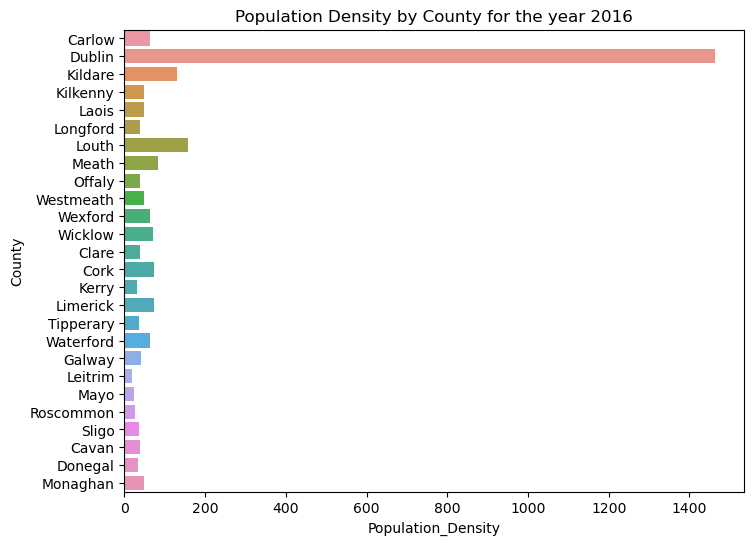

In [30]:
label_graph("Population_Density", "County", "Population Density by County for the year 2016",8,6)
sns.barplot(data = df_density.loc[df_density["Year"] == 2016], y = "County", x = "Population_Density");

- Denisty in Dublin over the years

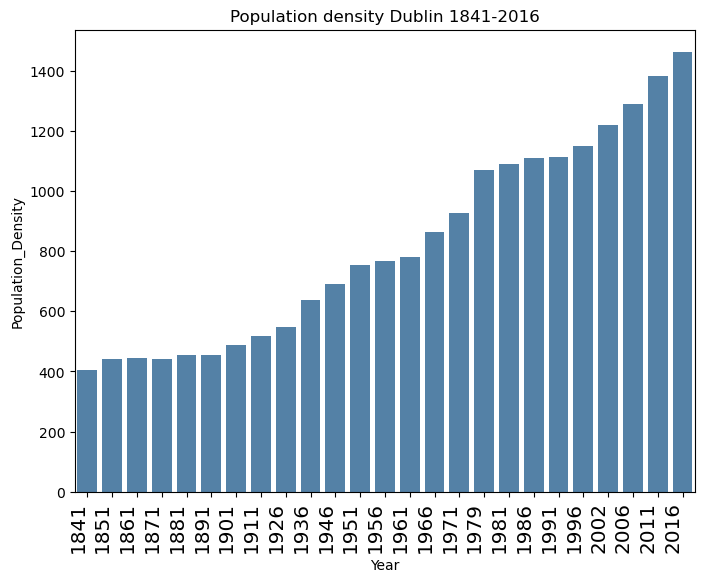

In [31]:
label_graph("Year", "Population_Density", "Population density Dublin 1841-2016",8,6)
sns.barplot(data = df_density.loc[df_density["County"] == "Dublin"], x = "Year", y = "Population_Density", color = "steelblue");
plt.xticks(
    rotation = 90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
);


The plot shows how the density in the county Dublin has increased which makes is consistent with the results observed before.

- Growth rate

In [32]:
growth_rate = []
df_growth = df_general
years = df_general["Year"].unique()

for i,row in df_general.iterrows():
    if row["Year"] == 1841:
        growth_rate.append(0)
    else:
        population = int(row["Population"])
        index = np.where(years == row["Year"])[0][0]
        prev_year = years[index-1]
        populationprev = int(df_general.loc[df_general["Year"] == prev_year]["Population"])
        grate = ((population - populationprev) / populationprev)*100
        growth_rate.append(grate)
        
df_growth["growth_rate"] = growth_rate

In [33]:
df_growth

,Stat_label,County,Sex,Year,Population,growth_rate
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799,0.000000
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557,-21.707545
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111,-13.879254
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187,-7.926288
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020,-4.519086
5,Population at Each Census 1841 to 2016,State,Both sexes,1891,3468694,-10.370127
6,Population at Each Census 1841 to 2016,State,Both sexes,1901,3221823,-7.117117
7,Population at Each Census 1841 to 2016,State,Both sexes,1911,3139688,-2.549333
8,Population at Each Census 1841 to 2016,State,Both sexes,1926,2971992,-5.341168
9,Population at Each Census 1841 to 2016,State,Both sexes,1936,2968420,-0.120189


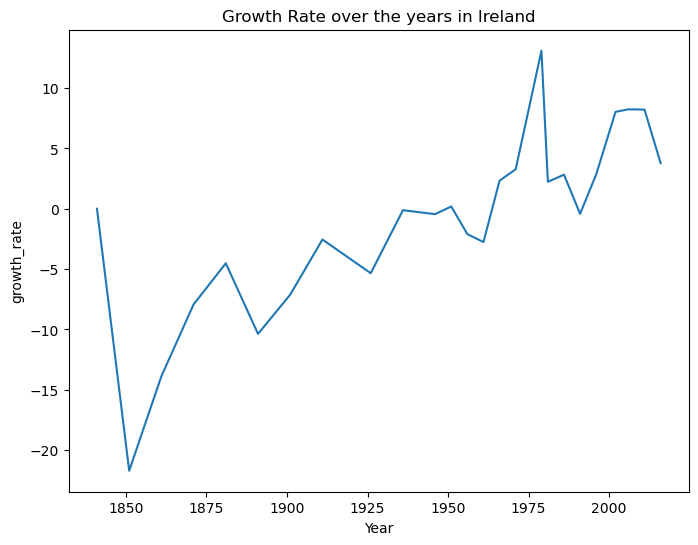

In [34]:
label_graph("Year", "growth_rate", "Growth Rate over the years in Ireland",8,6)
sns.lineplot(data = df_general, x = "Year", y = "growth_rate");

## Statistics

- Descriptive statistics

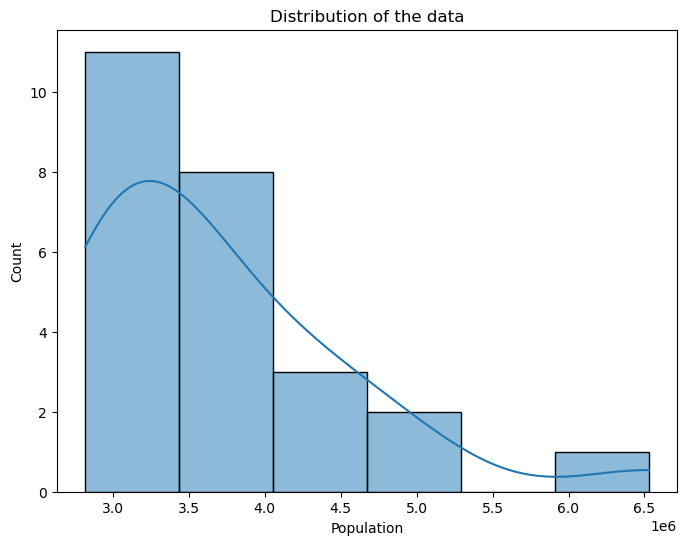

In [35]:
label_graph("Population", "Count", "Distribution of the data",8,6)
sns.histplot(df_general["Population"], kde = True);

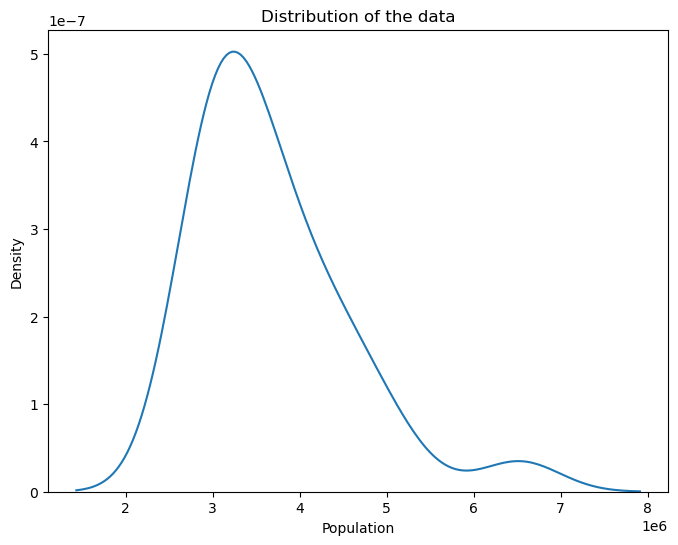

In [36]:
label_graph("Population", "Density", "Distribution of the data",8,6)
sns.kdeplot(df_general["Population"]);

right skewed  = Proved by formula 

In [37]:
#s = skew(df_general["Population"], axis = 0, bias= True)
#s
s = df_general["Population"].skew()
print(f'Coefficient of skewness (S): {s}')

Coefficient of skewness (S): 1.633217943332584


In [38]:
#k = kurtosis(df_general["Population"], axis = 0, fisher = True, bias = True)
#k
k = df_general["Population"].kurtosis()
print(f'Kurtosis (K): {s}')

Kurtosis (K): 1.633217943332584


In [39]:
median = np.median(df_general["Population"])
print(f'Median: {median}')
maximun = max(df_general["Population"])
print(f'Max Value: {maximun}')
minimun = min(df_general["Population"])
print(f'Min Value: {minimun}')
rangev = np.ptp(df_general["Population"])
print(f'Range: {rangev}')

Median: 3468694.0
Max Value: 6528799
Min Value: 2818341
Range: 3710458


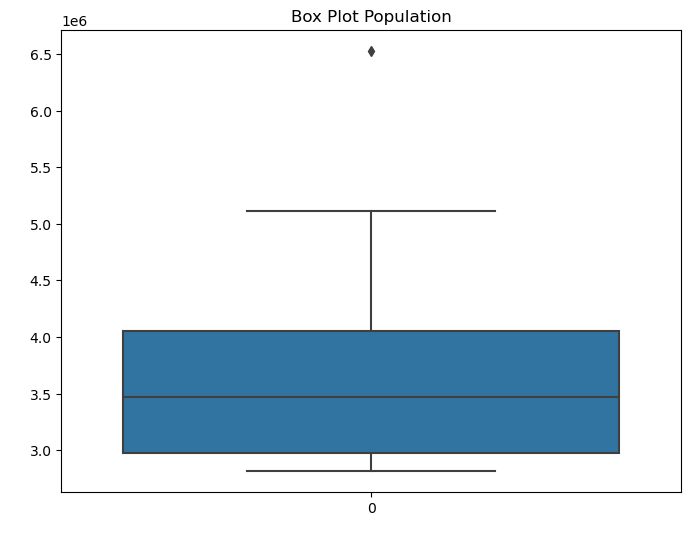

In [40]:
label_graph(" ", " ", "Box Plot Population",8,6)
sns.boxplot(df_general["Population"]);

In [41]:
df_general["Population"].describe()

count    2.500000e+01
mean     3.689683e+06
std      8.779863e+05
min      2.818341e+06
25%      2.971992e+06
50%      3.468694e+06
75%      4.053187e+06
max      6.528799e+06
Name: Population, dtype: float64

In [42]:
std = np.std(df_general["Population"], ddof =1)
print(f'Standard deviation: {median}')

Standard deviation: 3468694.0


In [43]:
quantiles = np.quantile(df_general["Population"],[0,0.25,0.5,0.75,1])
print(f'Quantiles: {quantiles}')

Quantiles: [2818341. 2971992. 3468694. 4053187. 6528799.]


In [44]:
q1 = np.quantile(df_general["Population"],0.25)
print(f'Q1: {q1}')
q2 = np.quantile(df_general["Population"],0.5)
print(f'Q2: {q2}')
q3 = np.quantile(df_general["Population"],0.75)
print(f'Q3: {q3}')

from scipy.stats import iqr
iqr = iqr(df_general["Population"])
print(f'IQR: {iqr}')

Q1: 2971992.0
Q2: 3468694.0
Q3: 4053187.0
IQR: 1081195.0


Outliers

In [45]:
dfprueba = df_general[((df_general["Population"]<(q1-1.5*iqr)) | (df_general["Population"]<(q3+1.5*iqr))) ]

In [46]:
df_prueba_shape = dfprueba.shape
print(f'Df_prueba_shape:  {df_prueba_shape}')
df_general_shape = df_general.shape
print(f'Df_general_shape: {df_prueba_shape}')

Df_prueba_shape:  (24, 6)
Df_general_shape: (24, 6)


In [47]:
outliers = (df_general[~((df_general["Population"]<(q1-(1.5*iqr))) | (df_general["Population"]<(q3+(1.5*iqr)))) ] )
outliers

,Stat_label,County,Sex,Year,Population,growth_rate
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799,0.0


- Q-Q plot

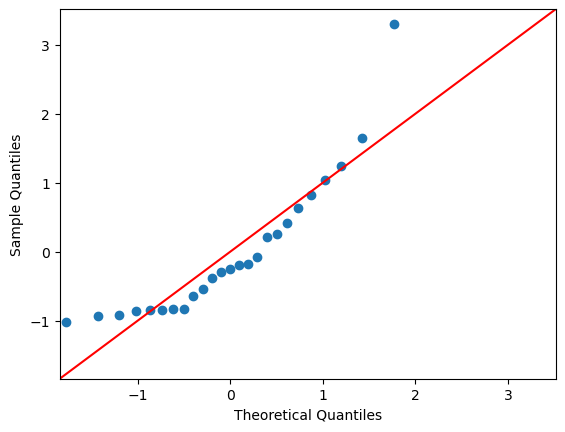

In [48]:
qqplot(df_general["Population"],norm, fit = True, line = "45")
plt.show()

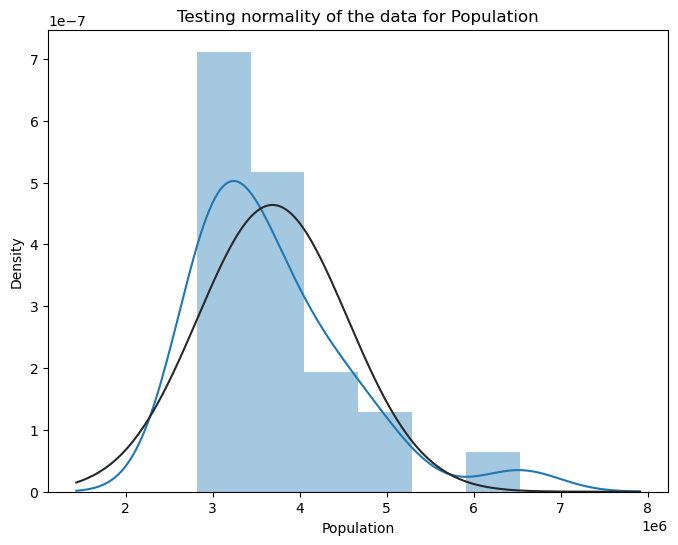

In [49]:
label_graph("Population", "Density", "Testing normality of the data for Population",8,6)
sns.distplot(df_general["Population"], fit = norm);

The plot above compares the distribution of the data for the attribute of Population with the normal distribution of that which has the bell shape, it is clear that the data is right skewed, and the plot works to reassure what has been calculated and proved before.

- Shapiro - Wilk test

Hypothesis
Ho (Accepted): The data are normally distributed (Po > 0.05)
Ha (Rejected): The data are not normally distributed 

In [50]:
shapiro(df_general["Population"])

ShapiroResult(statistic=0.8421999216079712, pvalue=0.0012569297105073929)

The value needed in this case is the pvalue.
It was stated in the Null Hypothesis that for a P value greater than 0.05 the data can be considered normally distributed.
In this particular case P is 0.0012 less than the alpha (0.05) then it can be rejected having sufficient evidence to say the data does not have a normal distribution.

- Binomial distribution

A binomial probability distribution is when there is only a probability of two outcomes. In this distribution, data are collected in one of two forms after repetitive trials and classified into either success or failure

In [51]:
l_encoder = LabelEncoder()
df_expanded["Sex"] = l_encoder.fit_transform(df_expanded["Sex"])
df_expanded

,Stat_label,County,Sex,Year,Population
100,Population at Each Census 1841 to 2016,Carlow,1,1841,42428
101,Population at Each Census 1841 to 2016,Carlow,1,1851,33016
102,Population at Each Census 1841 to 2016,Carlow,1,1861,28139
103,Population at Each Census 1841 to 2016,Carlow,1,1871,25464
104,Population at Each Census 1841 to 2016,Carlow,1,1881,23078
...,...,...,...,...,...
2020,Population at Each Census 1841 to 2016,Monaghan,0,1996,25155
2021,Population at Each Census 1841 to 2016,Monaghan,0,2002,25787
2022,Population at Each Census 1841 to 2016,Monaghan,0,2006,27414
2023,Population at Each Census 1841 to 2016,Monaghan,0,2011,30042


In [52]:
df_dublin = df_expanded[df_expanded["County"] == "Dublin"]
grouped = df_dublin.groupby("Sex")["Population"].sum()
grouped

Sex
0    9866583
1    9005841
Name: Population, dtype: int64

In [53]:
Total = grouped.sum()
Total

18872424

In [54]:
percent = []
index = 0

for element in grouped:
    percent.append({"Sex": index, "Value": element/Total})
    index += 1
    
percent

[{'Sex': 0, 'Value': 0.5228042248308962},
 {'Sex': 1, 'Value': 0.4771957751691039}]

- Male experiment

[0.0006123  0.00670824 0.03307222 0.09662169 0.18524871 0.24354484
 0.22235156 0.13920173 0.05718978 0.0139235 ]


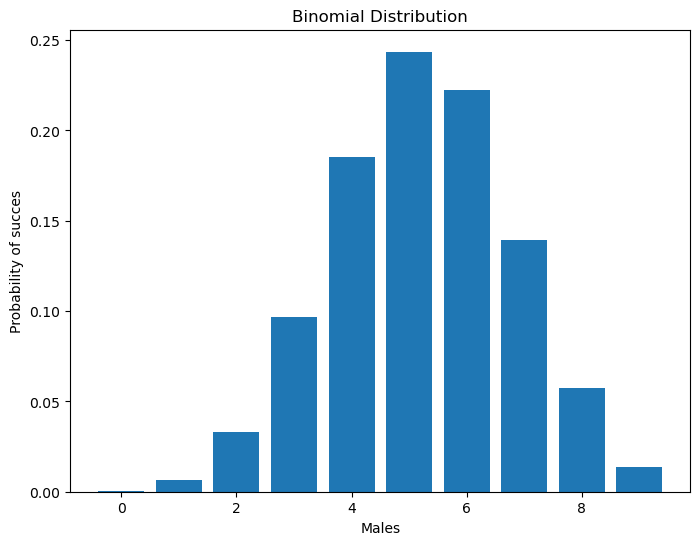

In [55]:
label_graph("Males", "Probability of succes", "Binomial Distribution",8,6)
n = 10 
p = 0.5228042248308962 
x = np.arange(0 , 10)
# calculate and plot binomial distribution
pmf = binom.pmf(x , n , p)
plt.bar(x , pmf)
print(pmf)


- Female experiment

[0.00152543 0.0139235  0.05718978 0.13920173 0.22235156 0.24354484
 0.18524871 0.09662169 0.03307222 0.00670824]


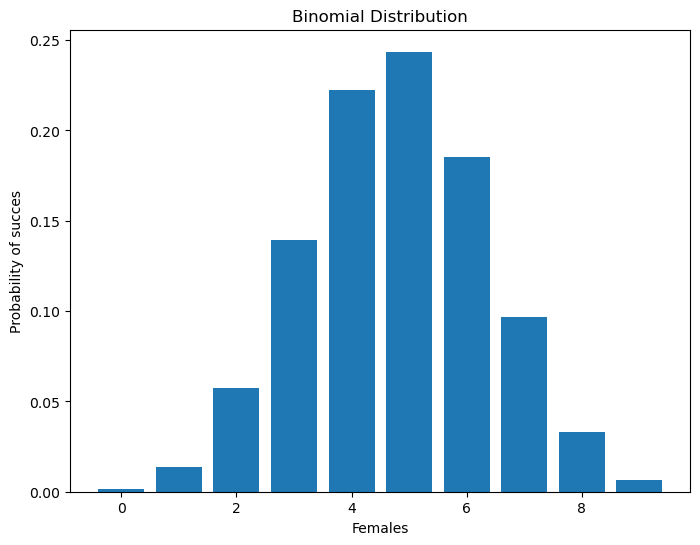

In [56]:
label_graph("Females", "Probability of succes", "Binomial Distribution",8,6)
n = 10 
p = 0.4771957751691039 
x = np.arange(0 , 10)
# calculate and plot binomial distribution
pmf = binom.pmf(x , n , p)
plt.bar(x , pmf)
print(pmf)

## Machine learning

- Logging the results of the model into a variable called results to store it and be able to show a summary of the results after all the models preformed.

In [57]:
results = []

In [58]:
def save_results(model,train_score,test_score):
    results.append([model,train_score,test_score])

Show results

In [59]:
def show_results():
    print(f'Model\t\t\t\t Train Score\t\t Test Score')
    for result in results:
        print(f'{result[0]}\t {result[1]}\t {result[2]}')


- Linear Regression model

0.23803670060620563 -1.151774023630849


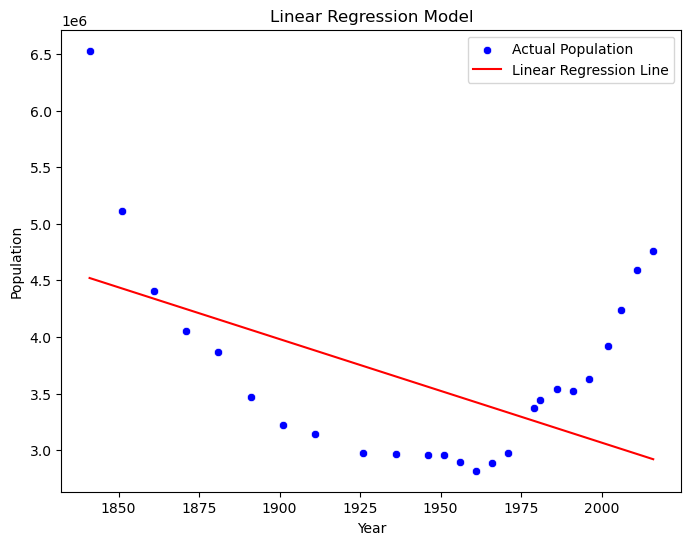

In [74]:
#Splitting the data
X = df_general[["Year"]]
y = df_general["Population"]

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

#Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)
predicted_population = my_lm.predict(X)

#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Display the training and test score
print(train_r2, test_r2)
save_results("Linear regression model\t",train_r2,test_r2)

#Plot result
label_graph("Year", "Population", "Linear Regression Model",8,6)
sns.scatterplot(x = "Year", y = "Population", data = df_general , color='blue', label='Actual Population')
sns.lineplot(x = "Year", y = predicted_population, data = df_general, color='red', label='Linear Regression Line')

# Show the plot
plt.show()


As the graph shows above there is not linear relationship between these two variables making the model not efficient for prediction. To try to make the model useful I tried to use a lagged variable of the population feature, adding 5 new columns with population values, giving the model more data to search for a relationship.

- Lagged Linear Regression model

In [62]:
df_general_lagged = df_general
#Adding lagged variable
df_general_lagged["population_l1"] = df_general_lagged["Population"].shift(1)
df_general_lagged["population_l2"] = df_general_lagged["Population"].shift(2)
df_general_lagged["population_l3"] = df_general_lagged["Population"].shift(3)
df_general_lagged["population_l4"] = df_general_lagged["Population"].shift(4)
df_general_lagged["population_l5"] = df_general_lagged["Population"].shift(5)

# Display the first 10 records
df_general_lagged.head(10)

,Stat_label,County,Sex,Year,Population,growth_rate,population_l1,population_l2,population_l3,population_l4,population_l5
0,Population at Each Census 1841 to 2016,State,Both sexes,1841,6528799,0.000000,NaN,NaN,NaN,NaN,NaN
1,Population at Each Census 1841 to 2016,State,Both sexes,1851,5111557,-21.707545,6528799.0,NaN,NaN,NaN,NaN
2,Population at Each Census 1841 to 2016,State,Both sexes,1861,4402111,-13.879254,5111557.0,6528799.0,NaN,NaN,NaN
3,Population at Each Census 1841 to 2016,State,Both sexes,1871,4053187,-7.926288,4402111.0,5111557.0,6528799.0,NaN,NaN
4,Population at Each Census 1841 to 2016,State,Both sexes,1881,3870020,-4.519086,4053187.0,4402111.0,5111557.0,6528799.0,NaN
5,Population at Each Census 1841 to 2016,State,Both sexes,1891,3468694,-10.370127,3870020.0,4053187.0,4402111.0,5111557.0,6528799.0
6,Population at Each Census 1841 to 2016,State,Both sexes,1901,3221823,-7.117117,3468694.0,3870020.0,4053187.0,4402111.0,5111557.0
7,Population at Each Census 1841 to 2016,State,Both sexes,1911,3139688,-2.549333,3221823.0,3468694.0,3870020.0,4053187.0,4402111.0
8,Population at Each Census 1841 to 2016,State,Both sexes,1926,2971992,-5.341168,3139688.0,3221823.0,3468694.0,3870020.0,4053187.0
9,Population at Each Census 1841 to 2016,State,Both sexes,1936,2968420,-0.120189,2971992.0,3139688.0,3221823.0,3468694.0,3870020.0


In [63]:
# Drop Null values from the dataframe
df_general_lagged = df_general_lagged.dropna()

# Display the first 10 records
df_general_lagged.head(10)

,Stat_label,County,Sex,Year,Population,growth_rate,population_l1,population_l2,population_l3,population_l4,population_l5
5,Population at Each Census 1841 to 2016,State,Both sexes,1891,3468694,-10.370127,3870020.0,4053187.0,4402111.0,5111557.0,6528799.0
6,Population at Each Census 1841 to 2016,State,Both sexes,1901,3221823,-7.117117,3468694.0,3870020.0,4053187.0,4402111.0,5111557.0
7,Population at Each Census 1841 to 2016,State,Both sexes,1911,3139688,-2.549333,3221823.0,3468694.0,3870020.0,4053187.0,4402111.0
8,Population at Each Census 1841 to 2016,State,Both sexes,1926,2971992,-5.341168,3139688.0,3221823.0,3468694.0,3870020.0,4053187.0
9,Population at Each Census 1841 to 2016,State,Both sexes,1936,2968420,-0.120189,2971992.0,3139688.0,3221823.0,3468694.0,3870020.0
10,Population at Each Census 1841 to 2016,State,Both sexes,1946,2955107,-0.448488,2968420.0,2971992.0,3139688.0,3221823.0,3468694.0
11,Population at Each Census 1841 to 2016,State,Both sexes,1951,2960593,0.185645,2955107.0,2968420.0,2971992.0,3139688.0,3221823.0
12,Population at Each Census 1841 to 2016,State,Both sexes,1956,2898264,-2.105288,2960593.0,2955107.0,2968420.0,2971992.0,3139688.0
13,Population at Each Census 1841 to 2016,State,Both sexes,1961,2818341,-2.757616,2898264.0,2960593.0,2955107.0,2968420.0,2971992.0
14,Population at Each Census 1841 to 2016,State,Both sexes,1966,2884002,2.329775,2818341.0,2898264.0,2960593.0,2955107.0,2968420.0


0.8968720166450963 0.545855474665699


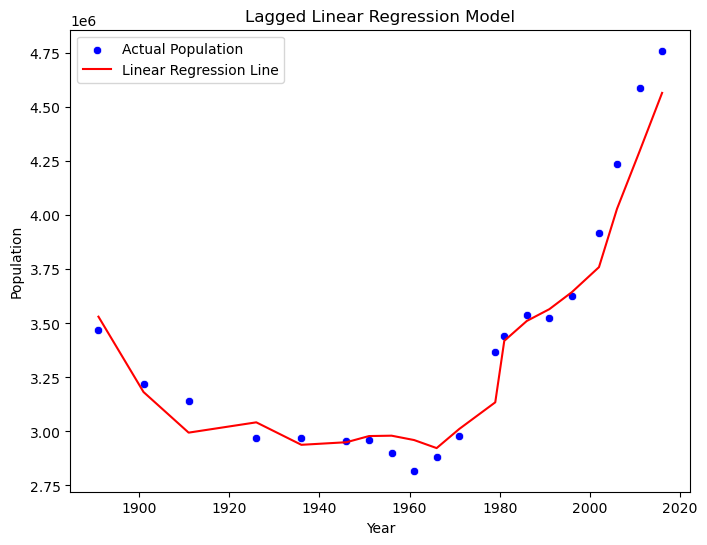

In [64]:
#Fitting the full Linear Regression model

# Create X and y objects
X = df_general_lagged[["Year", "population_l1", "population_l2", "population_l3", "population_l4", "population_l5"]]
y = df_general_lagged["Population"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle = False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

# Calculate the train Forecasting
train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)
predicted_population = my_lm.predict(X)

# Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the results for train and test
print(train_r2, test_r2)
save_results("Lagged Linear regression",train_r2,test_r2)

#Plot result
label_graph("Year", "Population", "Lagged Linear Regression Model",8,6)
sns.scatterplot(x = "Year", y = "Population", data = df_general_lagged , color='blue', label='Actual Population')
sns.lineplot(x = "Year", y = predicted_population, data = df_general_lagged, color='red', label='Linear Regression Line')

# Show the plot
plt.show()

As shown above, the model improved by getting a training score of 89% and a test score of 54%, it seems that with the lagged values the model works as a proper linear regression. As the essays showed that linear regression does not make a complete fit with the dataset, I decided to analyze the polynomial regression.

- Polinomial Regression

In [65]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

0.9777389842306199 0.9637768523786585


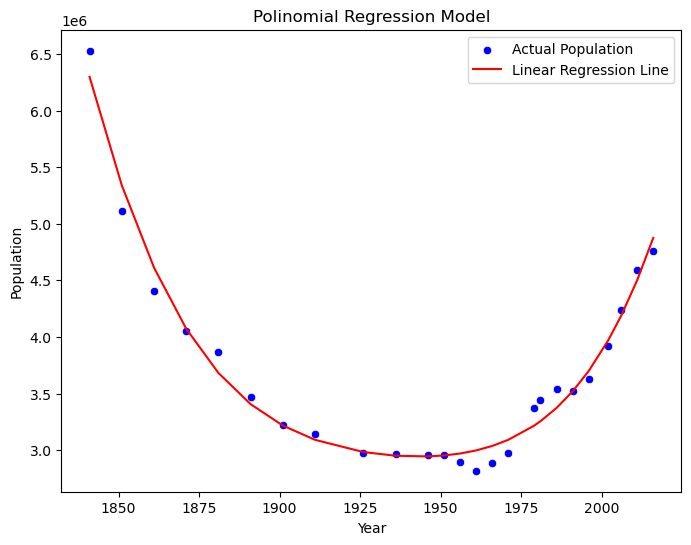

In [66]:

# Create X and y objects
X = df_general[["Year"]]
y = df_general["Population"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle = False)

poly = PolynomialFeatures(degree = 6)
poly
poly_features = poly.fit_transform(X)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)
poly_model = LinearRegression()
poly_model.fit(poly_features, y)  

train_fcst = poly_model.predict(poly_X_train)
test_fcst = poly_model.predict(poly_X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)
save_results("Polinomial regression model",train_r2,test_r2)

predict_population = poly_model.predict(poly_features)

#Plot result
label_graph("Year", "Population", "Polinomial Regression Model",8,6)
sns.scatterplot(x = "Year", y = "Population", data = df_general , color='blue', label='Actual Population')
sns.lineplot(x = "Year", y = predict_population, data = df_general, color='red', label='Linear Regression Line')

# Show the plot
plt.show()


In [67]:
predict_population = poly_model.predict(poly.fit_transform([[2033]]))
predict_population

array([6685109.97568512])

The polynomial regression model showed a better performance getting a training score of 97% and a test score of 96%, which led me to believe I could get good predictions using it.

- Ridge Regression

0.5066440079152729 -17.424616850643574


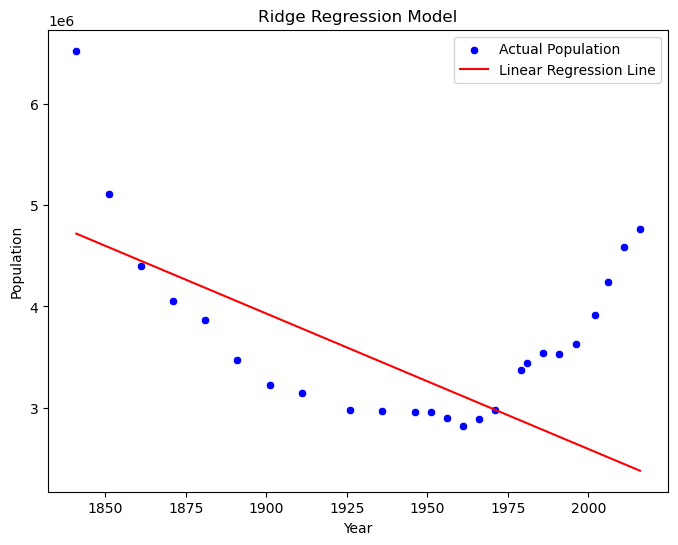

Training set score: 0.51
Test set score: -17.42


In [68]:
from sklearn.linear_model import Ridge

#Splitting the data
X = df_general[["Year"]]
y = df_general["Population"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, shuffle = False)

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Calculate the train Forecasting
train_fcst = ridge.predict(X_train)
test_fcst = ridge.predict(X_test)
predicted_population = ridge.predict(X)

# Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the results for train and test
print(train_r2, test_r2)
save_results("Ridge regression model\t",train_r2,test_r2)

#Plot result
label_graph("Year", "Population", "Ridge Regression Model",8,6)
sns.scatterplot(x = "Year", y = "Population", data = df_general , color='blue', label='Actual Population')
sns.lineplot(x = "Year", y = predicted_population, data = df_general, color='red', label='Linear Regression Line')

# Show the plot
plt.show()

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

0.50664398278082 -17.420347264500826


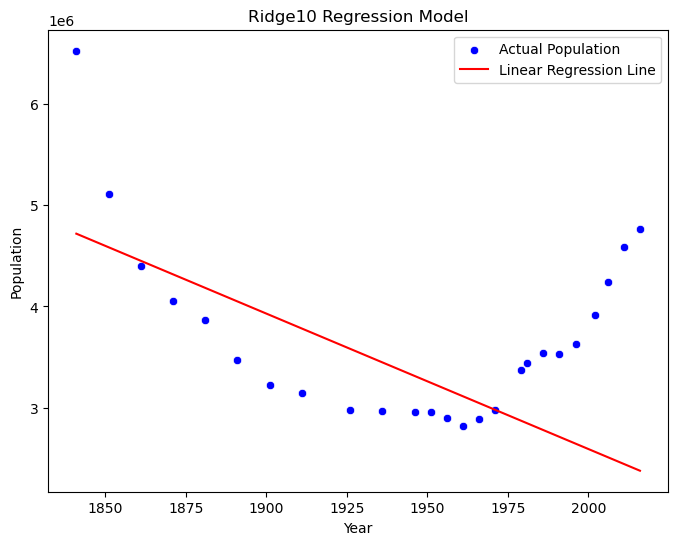

Training set score: 0.51
Test set score: -17.42


In [69]:
#Splitting the data
X = df_general[["Year"]]
y = df_general["Population"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12345, shuffle = False)

# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Calculate the train Forecasting
train_fcst = ridge10.predict(X_train)
test_fcst = ridge10.predict(X_test)
predicted_population = ridge10.predict(X)

# Calculate teh r2 score for train and test
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

# Display the results for train and test
print(train_r2, test_r2)
save_results("Ridge regression model\t",train_r2,test_r2)

#Plot result
label_graph("Year", "Population", "Ridge10 Regression Model",8,6)
sns.scatterplot(x = "Year", y = "Population", data = df_general , color='blue', label='Actual Population')
sns.lineplot(x = "Year", y = predicted_population, data = df_general, color='red', label='Linear Regression Line')

# Show the plot
plt.show()

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

The Ridge regression does not look accurate even graphically the training and test results throw numbers that reveal that the model can not obtain good results with the dataset provided to train. 

- Decision Tree regression

0.9434731364487585 0.8178150226893269


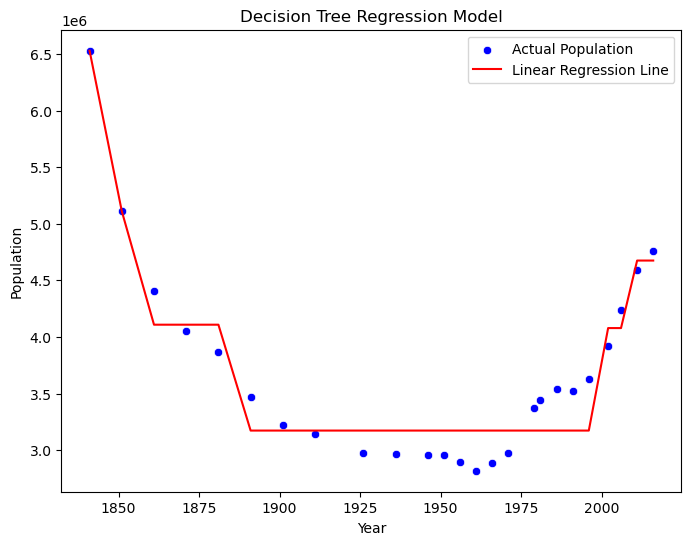

In [70]:
# import DecisionTreeRegressor from the sklearn library
#from sklearn.tree import DecisionTreeRegressor

# Store the feature or attribute values in X and y
X = df_general[["Year"]].values
y = df_general["Population"].values

# Split the data set into Training and Testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Initialise an object by calling a method DecisionTreeRegressor()
tree = DecisionTreeRegressor(max_depth = 3)
tree.fit(X, y)


train_fcst = tree.predict(X_train)
test_fcst = tree.predict(X_test)
predicted_population = tree.predict(X)


#Store the R2 error into train_r2 and test_r2
train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

#Display the training and test score
print(train_r2, test_r2)
save_results("Decision Tree regression model",train_r2,test_r2)

#Plot result
label_graph("Year", "Population", "Decision Tree Regression Model",8,6)
sns.scatterplot(x = "Year", y = "Population", data = df_general , color='blue', label='Actual Population')
sns.lineplot(x = "Year", y = predicted_population, data = df_general, color='red', label='Linear Regression Line')

# Show the plot
plt.show()

Decision tree regression shows good training and test scores however due to the spirit of the model and the type of dataset I would think more investigation will be needed to conclude that this model is accurate in this particular case.

In [71]:
predicted_population = tree.predict([[2043]])
predicted_population

array([4675058.5])

In [73]:
show_results()

Model				 Train Score		 Test Score
Linear regression model		 0.23803670060620563	 -1.151774023630849
Lagged Linear regression	 0.8968720166450963	 0.545855474665699
Polinomial regression model	 0.9777389842306199	 0.9637768523786585
Ridge regression model		 0.5066440079152729	 -17.424616850643574
Ridge regression model		 0.50664398278082	 -17.420347264500826
Decision Tree regression model	 0.9434731364487585	 0.8178150226893269
